# E-Commerce Analytics Project

In [262]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [263]:
Customers=pd.read_csv(r'CUSTOMERS.csv').convert_dtypes()
Customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [264]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  string
 1   customer_unique_id        99441 non-null  string
 2   customer_zip_code_prefix  99441 non-null  Int64 
 3   customer_city             99441 non-null  string
 4   customer_state            99441 non-null  string
dtypes: Int64(1), string(4)
memory usage: 3.9 MB


In [265]:
Orders=pd.read_csv(r'ORDERS.csv').convert_dtypes()
Orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [266]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  string
 1   customer_id                    99441 non-null  string
 2   order_status                   99441 non-null  string
 3   order_purchase_timestamp       99441 non-null  string
 4   order_approved_at              99281 non-null  string
 5   order_delivered_carrier_date   97658 non-null  string
 6   order_delivered_customer_date  96476 non-null  string
 7   order_estimated_delivery_date  99441 non-null  string
dtypes: string(8)
memory usage: 6.1 MB


In [267]:
Products=pd.read_csv(r'PRODUCTS.csv').convert_dtypes()
Products.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45,67,2,12300,40,40,40
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41,971,1,1700,16,19,16
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50,799,1,1400,27,7,27
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60,156,2,700,31,13,20
32950,106392145fca363410d287a815be6de4,Bed_Bath_Table,58,309,1,2083,12,2,7


In [268]:
Sellers=pd.read_csv(r'SELLERS.csv').convert_dtypes()
Sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [269]:
Geo_Location=pd.read_csv(r'GEO_LOCATION.csv').convert_dtypes()
Geo_Location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.64482,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [270]:
Order_Items=pd.read_csv(r'ORDER_ITEMS.csv').convert_dtypes()
Order_Items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.9,18.14


In [271]:
Order_Payments=pd.read_csv(r'ORDER_PAYMENTS.csv').convert_dtypes()
Order_Payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [272]:
Order_Review_Ratings=pd.read_csv(r'ORDER_REVIEW_RATINGS.csv').convert_dtypes()
Order_Review_Ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


# 1. Perform Detailed exploratory analysis
### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products,
### Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [273]:
Order_Payments['Total_Payment']=Order_Payments.payment_value * Order_Payments.payment_installments
print("Total Revenue :",Order_Payments.Total_Payment.sum())


Total Revenue : 65763157.62


In [274]:
print("Total Quantity :",Order_Items.shape[0])

Total Quantity : 112650


In [275]:
print("Total Products :",Products.product_id.nunique())

Total Products : 32951


In [276]:
print("Total categories :",Products.product_category_name.nunique())

Total categories : 71


In [277]:
print("Total Sellers :",Sellers.seller_id.count())

Total Sellers : 3095


In [278]:
print("Total Locations :",Geo_Location.geolocation_zip_code_prefix.nunique())

Total Locations : 19015


In [279]:
print("Total Payment Methods :",Order_Payments.payment_type.nunique())

Total Payment Methods : 5


### b. Understanding how many new customers acquired every month

In [280]:
Customers_Orders=pd.merge(left=Customers,right=Orders,on="customer_id")
Customers_Orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00


In [281]:
Customers_Orders.order_purchase_timestamp=pd.to_datetime(Customers_Orders.order_purchase_timestamp,format='%m/%d/%Y %H:%M')

In [282]:
Customers_Orders['Year_Month']=Customers_Orders.order_purchase_timestamp.apply(lambda x:pd.Timestamp.strftime(x,format="%Y-%m"))
Customers_Orders.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_Month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05


In [283]:
Customers_YearMonth=Customers_Orders.loc[:,['customer_unique_id','Year_Month']]

In [284]:
Customers_YearMonth.drop_duplicates(subset=['customer_unique_id'],keep='first',inplace=True)

In [285]:
New_Customers_Acquired=Customers_YearMonth.groupby('Year_Month')['customer_unique_id'].count()
New_Customers_Acquired

Year_Month
2016-09       4
2016-10     315
2017-01     749
2017-02    1727
2017-03    2595
2017-04    2318
2017-05    3533
2017-06    3103
2017-07    3864
2017-08    4144
2017-09    4089
2017-10    4449
2017-11    7305
2017-12    5491
2018-01    7029
2018-02    6464
2018-03    7001
2018-04    6751
2018-05    6678
2018-06    6013
2018-07    6117
2018-08    6348
2018-09       8
2018-10       1
Name: customer_unique_id, dtype: int64

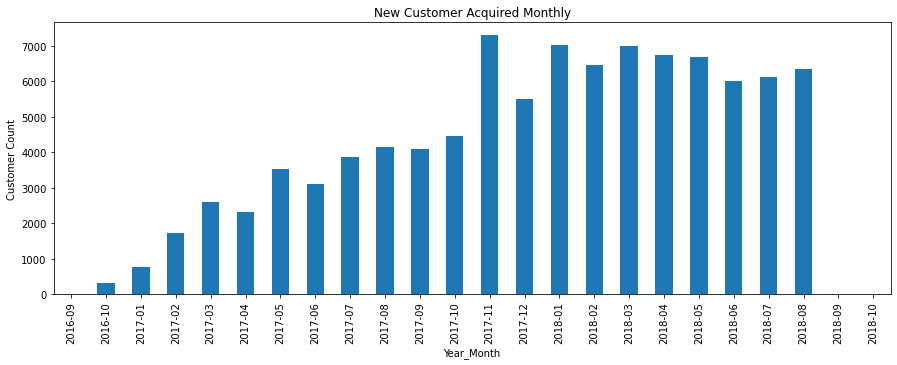

In [286]:
New_Customers_Acquired.plot(kind='bar',figsize=(15,5))
plt.title("New Customer Acquired Monthly")
plt.ylabel("Customer Count")
plt.show()

### c. Understand the retention of customers on month on month basis


In [287]:
Cust_Monthly_Count=Customers_Orders.groupby('Year_Month')[['customer_unique_id']].count().reset_index()
Cust_Monthly_Count

,Year_Month,customer_unique_id
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [288]:
Cust_Monthly_Count.customer_unique_id.sum()

99441

In [289]:
Customers_Retention=pd.merge(left=Cust_Monthly_Count,right=New_Customers_Acquired,on='Year_Month')
Customers_Retention.head()

,Year_Month,customer_unique_id_x,customer_unique_id_y
0,2016-09,4,4
1,2016-10,324,315
2,2017-01,800,749
3,2017-02,1780,1727
4,2017-03,2682,2595


In [290]:
Customers_Retention['Customers_Retained']=Customers_Retention.customer_unique_id_x - Customers_Retention.customer_unique_id_y
Customers_Retention

,Year_Month,customer_unique_id_x,customer_unique_id_y,Customers_Retained
0,2016-09,4,4,0
1,2016-10,324,315,9
2,2017-01,800,749,51
3,2017-02,1780,1727,53
4,2017-03,2682,2595,87
5,2017-04,2404,2318,86
6,2017-05,3700,3533,167
7,2017-06,3245,3103,142
8,2017-07,4026,3864,162
9,2017-08,4331,4144,187


### d. How the revenues from existing/new customers on month on month basis

In [291]:
Customers_Orders_Payments=pd.merge(left=Customers_Orders,right=Order_Payments,on='order_id')
Customers_Orders_Payments.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_Month,payment_sequential,payment_type,payment_installments,payment_value,Total_Payment
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05,1,credit_card,2,146.87,293.74
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01,1,credit_card,8,335.48,2683.84
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-05,1,credit_card,7,157.73,1104.11
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-03,1,credit_card,1,173.3,173.3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-07,1,credit_card,8,252.25,2018.0


In [292]:
Total_Revenue=Customers_Orders_Payments.groupby('Year_Month')[['Total_Payment']].sum()
Total_Revenue

,Total_Payment
Year_Month,
2016-09,443.31
2016-10,311087.22
2016-12,19.62
2017-01,617745.71
2017-02,1195483.77
2017-03,2023623.1
2017-04,1897830.07
2017-05,2644531.62
2017-06,2328722.47


<AxesSubplot:xlabel='Year_Month'>

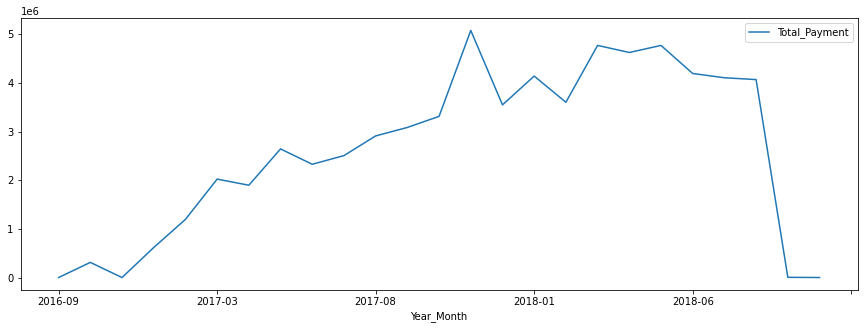

In [293]:
Total_Revenue.plot(kind='line',figsize=(15,5))

### e. Understand the trends/seasonality of sales, quantity by category, location, month, 
### week, day, time, channel, payment method etc…


In [294]:
Orders_OI=pd.merge(left=Orders,right=Order_Items,on='order_id')
Orders_OI_Products=pd.merge(left=Orders_OI,right=Products,on='product_id')
Orders_OI_Products

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,Housewares,40,268,4,500,19,8,13
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/2017 18:29,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,Housewares,40,268,4,500,19,8,13
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/2017 18:24,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,Housewares,40,268,4,500,19,8,13
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,10/23/2017 23:26,10/25/2017 2:14,10/27/2017 16:48,11/7/2017 18:04,11/13/2017 0:00,1,87285b34884572647811a353c7ac498a,...,29.99,14.1,Housewares,40,268,4,500,19,8,13
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.7,22.76,Perfumery,29,178,1,400,19,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,8/10/2017 21:21,8/10/2017 21:35,8/18/2017 16:42,8/23/2017 15:36,8/31/2017 0:00,1,0df37da38a30a713453b03053d60d3f7,...,356.0,18.12,Sports_Leisure,53,1105,1,2800,28,23,23
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,8/10/2017 21:21,8/10/2017 21:35,8/18/2017 16:42,8/23/2017 15:36,8/31/2017 0:00,2,0df37da38a30a713453b03053d60d3f7,...,356.0,18.12,Sports_Leisure,53,1105,1,2800,28,23,23
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,12/20/2017 9:52,12/20/2017 10:09,12/20/2017 20:25,1/26/2018 15:45,1/18/2018 0:00,1,3d2c44374ee42b3003a470f3e937a2ea,...,55.9,15.14,Musical_Instruments,34,372,2,300,16,6,12
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,1,ac35486adb7b02598c182c2ff2e05254,...,72.0,13.08,Health_Beauty,50,1517,1,1175,22,13,18


In [295]:
Orders_OI_Products.order_purchase_timestamp=pd.to_datetime(Orders_OI_Products.order_purchase_timestamp,format='%m/%d/%Y %H:%M')

In [296]:
Orders_OI_Products['Month']=Orders_OI_Products.order_purchase_timestamp.apply(lambda x:pd.Timestamp.strftime(x,format="%b"))


In [297]:
# Trend of sales and quantity by category
Orders_OI_Products.groupby('product_category_name').agg({'product_id':'count','price':'sum'}).rename(columns={'product_id':'Quantity','price':'Sales'})

,Quantity,Sales
product_category_name,,
Agro_Industry_And_Commerce,212,72530.47
Air_Conditioning,297,55024.96
Art,209,24202.64
Arts_And_Craftmanship,24,1814.01
Audio,364,50688.5
...,...,...
Stationery,2517,230943.23
Tablets_Printing_Image,83,7528.41
Telephony,4545,323667.53


In [298]:
# Seasonality of sales and quantity by Month
Orders_OI_Products.groupby('Month').agg({'product_id':'count','price':'sum'}).rename(columns={'product_id':'Quantity','price':'Sales'})

,Quantity,Sales
Month,,
Apr,10659,1356574.98
Aug,12158,1428658.01
Dec,6309,743925.07
Feb,9623,1091481.73
Jan,9163,1070343.23
Jul,11611,1393538.7
Jun,10661,1298162.91
Mar,11217,1357557.74
May,12061,1502588.82


In [299]:
# Trend of sales & quantity  by Payment Type
Customers_Orders_Payments.groupby('payment_type').agg({'order_id':'count','payment_value':'sum'}).rename(columns={'order_id':'Quantity','payment_value':'Sales'})

,Quantity,Sales
payment_type,,
UPI,19784,2869361.27
credit_card,76795,12542084.19
debit_card,1529,217989.79
not_defined,3,0.0
voucher,5775,379436.87


In [300]:
# Trend of sales & quantity by location
Customers_Orders_Payments.groupby('customer_state').agg({'order_id':'count','Total_Payment':'sum'}).rename(columns={'order_id':'Quantity','Total_Payment':'Sales'})

,Quantity,Sales
customer_state,,
Andhra Pradesh,63563,37313149.3
Arunachal Pradesh,1157,812340.62
Chhattisgarh,6622,4687424.95
Delhi,3485,2469990.1
Goa,10,2825.88
Gujarat,7782,5418861.02
Haryana,2320,1517763.67
Himachal Pradesh,762,542289.78
Jammu & Kashmir,1587,1126724.21


### f. Popular Products by month, seller, state, category.

In [301]:
# Popular Products by Category
Popular_bycategory=Orders_OI_Products.groupby('product_category_name').agg({'product_id':'count'}).rename(columns={'product_id':'Quantity'}).sort_values(by='Quantity',ascending=False)
Popular_bycategory

,Quantity
product_category_name,
Bed_Bath_Table,11115
Health_Beauty,9670
Sports_Leisure,8641
Furniture_Decor,8334
Computers_Accessories,7827
...,...
Arts_And_Craftmanship,24
La_Cuisine,14
Cds_Dvds_Musicals,14


In [307]:
# Popular Products by Month
Popular_bymonth=Orders_OI_Products.groupby(['Month','product_category_name']).agg({'product_id':'count'}).rename(columns={'product_id':'Quantity'})
Popular_bymonth=Popular_bymonth.sort_values(by=['Quantity'],ascending=False)
Popular_bymonth.head(10)

Quantity
Month product_category_name          
Aug   Health_Beauty              1209
Jul   Bed_Bath_Table             1203
Aug   Bed_Bath_Table             1170
Jun   Bed_Bath_Table             1155
      Health_Beauty              1145
May   Bed_Bath_Table             1116
Jul   Health_Beauty              1100
Mar   Bed_Bath_Table             1087
Feb   Computers_Accessories      1087
May   Health_Beauty              1060

In [303]:
# Popular Products by State
Customers_Orders_Payments_OI_Products=pd.merge(left=Customers_Orders_Payments,right=Orders_OI_Products,on='order_id')
Customers_Orders_Payments_OI_Products.head()

,customer_id_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,21.88,Office_Furniture,41,1141,1,8683,54,64,31,May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,46.48,Housewares,43,1002,3,10150,89,15,40,Jan
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,17.79,Office_Furniture,55,955,1,8267,52,52,17,May
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,23.36,Office_Furniture,48,1066,1,12160,56,51,28,Mar
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,22.25,Home_Confort,61,407,1,5200,45,15,35,Jul


In [310]:
Popular_bystate=Customers_Orders_Payments_OI_Products.groupby(['customer_state','product_category_name']).agg({'order_id':'count'}).rename(columns={'order_id':'Quantity'})
Popular_bystate=Popular_bystate.sort_values(by=['Quantity'],ascending=False)
Popular_bystate

Quantity
customer_state    product_category_name              
Andhra Pradesh    Bed_Bath_Table                 7629
                  Health_Beauty                  6202
                  Sports_Leisure                 5525
                  Furniture_Decor                5517
                  Computers_Accessories          5020
...                                               ...
Haryana           Furniture_Bedroom                 1
Arunachal Pradesh Costruction_Tools_Tools           1
Uttar Pradesh     Construction_Tools_Safety         1
Delhi             Books_Imported                    1
Uttar Pradesh     Fashion_Underwear_Beach           1

[1076 rows x 1 columns]

In [305]:
# Popular Products by Seller
COOIPPS=pd.merge(left=Customers_Orders_Payments_OI_Products,right=Sellers,on='seller_id')
COOIPPS.head()

,customer_id_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Month,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,1141,1,8683,54,64,31,May,8577,Vijayawada,Andhra Pradesh
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,955,1,8267,52,52,17,May,8577,Vijayawada,Andhra Pradesh
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,1066,1,12160,56,51,28,Mar,8577,Vijayawada,Andhra Pradesh
3,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,Chilakaluripet,Andhra Pradesh,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:00,7/8/2018 10:30,7/25/2018 15:12,...,1128,1,16133,63,59,25,Jul,8577,Vijayawada,Andhra Pradesh
4,8276de07ef25225d412b8462d73f8664,332cf4e83e16004ba7dca932ce82475b,90010,Eluru,Andhra Pradesh,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:00,4/4/2017 5:55,4/13/2017 16:28,...,154,1,2600,40,45,39,Apr,8577,Vijayawada,Andhra Pradesh


In [306]:
Popular_byseller=COOIPPS.groupby(['seller_id','product_category_name']).agg({'order_id':'count'}).rename(columns={'order_id':'Quantity'}).sort_values(by=['Quantity'],ascending=False)
Popular_byseller

Quantity
seller_id                        product_category_name              
1f50f920176fa81dab994f9023523100 Garden_Tools                   1954
6560211a19b47992c3666cc44a7e94c0 Watches_Gifts                  1693
4a3ca9315b744ce9f8e9374361493884 Bed_Bath_Table                 1686
da8622b14eb17ae2831f4ac5b9dab84a Bed_Bath_Table                 1362
1025f0e2d44d7041d6cf58b6550e0bfa Furniture_Decor                1324
...                                                              ...
85cc55e048b6bcc90c75afe7f0e72f72 Construction_Tools_Lights         1
                                 Signaling_And_Security            1
85d9eb9ddc5d00ca9336a2219c97bb13 Luggage_Accessories               1
                                 Market_Place                      1
ffff564a4f9085cd26170f4732393726 Market_Place                      1

[6352 rows x 1 columns]

### g. Popular categories by state, month

In [108]:
#Popular Categories by Month
Popcateg_bymon=COOIPPS.groupby(['product_category_name','Month']).agg({'product_id':'count'}).rename(columns={'product_id':'Quantity'})
Popcateg_bymon=Popcateg_bymon.sort_values(by=['Month'],ascending=[True])
Popcateg_bymon


,,Quantity
product_category_name,Month,
Agro_Industry_And_Commerce,Apr,12
Home_Appliances_2,Apr,26
Stationery,Apr,200
Party_Supplies,Apr,2
Consoles_Games,Apr,66
...,...,...
Cool_Stuff,Sep,212
Small_Appliances_Home_Oven_And_Coffee,Sep,1
Bed_Bath_Table,Sep,567


In [109]:
Popcateg_bystate=COOIPPS.groupby(['product_category_name','customer_state']).agg({'order_id':'count'}).rename(columns={'order_id':'Quantity'})
Popcateg_bystate=Popcateg_bystate.sort_values(by=['Quantity'],ascending=False).drop_duplicates()
Popcateg_bystate

,,Quantity
product_category_name,customer_state,
Bed_Bath_Table,Andhra Pradesh,7629
Health_Beauty,Andhra Pradesh,6202
Sports_Leisure,Andhra Pradesh,5525
Furniture_Decor,Andhra Pradesh,5517
Computers_Accessories,Andhra Pradesh,5020
...,...,...
Fixed_Telephony,Tamil Nadu,5
Food_Drink,Madhya Pradesh,4
Fixed_Telephony,Arunachal Pradesh,3


### h. List top 10 most expensive products sorted by price


In [110]:
COOIPPS.loc[:,['product_category_name','price']].sort_values(by='price',ascending=False).head(10)

,product_category_name,price
112762,Housewares,6735.0
114718,Computers,6729.0
102397,Art,6499.0
112286,Small_Appliances,4799.0
112284,Small_Appliances,4690.0
106321,Computers,4590.0
66046,Musical_Instruments,4399.87
88532,Consoles_Games,4099.99
104550,Sports_Leisure,4059.0
26922,Watches_Gifts,3999.9


# 2. Performing Customers/sellers Segmentation
### a. Divide the customers into groups based on the revenue generated

In [112]:
Customer_Segment=COOIPPS.groupby('customer_unique_id')[['Total_Payment']].sum()

Customer_Segment=Customer_Segment.rename(columns={'Total_Payment':'Amount_Spend'})
Customer_Segment['Customer Group']=np.where(Customer_Segment.Amount_Spend<1000,'Low Revnue Customer',np.where(Customer_Segment.Amount_Spend>3000,'High Revenue Customer','Mid Revenue Customer'))
Customer_Segment

,Amount_Spend,Customer Group
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1135.2,Mid Revenue Customer
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,Low Revnue Customer
0000f46a3911fa3c0805444483337064,689.76,Low Revnue Customer
0000f6ccb0745a6a4b88665a16c9f078,174.48,Low Revnue Customer
0004aac84e0df4da2b147fca70cf8255,1181.34,Mid Revenue Customer
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,41348.4,High Revenue Customer
fffea47cd6d3cc0a88bd621562a9d061,84.58,Low Revnue Customer
ffff371b4d645b6ecea244b27531430a,112.46,Low Revnue Customer


### b. Divide the sellers into groups based on the revenue generated 

In [113]:
Seller_Segment=COOIPPS.groupby('seller_id')[['price']].sum()
Seller_Segment=Seller_Segment.rename(columns={'price':'Amount_Sold'})
Seller_Segment['Seller Group']=np.where(Seller_Segment.Amount_Sold<1000,'Low Revenue Seller',np.where(Seller_Segment.Amount_Sold>2000,'High Revenue Seller','Mid Revenue Seller'))
Seller_Segment

,Amount_Sold,Seller Group
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,2685.0,High Revenue Seller
001cca7ae9ae17fb1caed9dfb1094831,25248.93,High Revenue Seller
001e6ad469a905060d959994f1b41e4f,250.0,Low Revenue Seller
002100f778ceb8431b7a1020ff7ab48f,1283.2,Mid Revenue Seller
003554e2dce176b5555353e4f3555ac8,120.0,Low Revenue Seller
...,...,...
ffcfefa19b08742c5d315f2791395ee5,69.9,Low Revenue Seller
ffdd9f82b9a447f6f8d4b91554cc7dd3,2140.8,High Revenue Seller
ffeee66ac5d5a62fe688b9d26f83f534,1839.86,Mid Revenue Seller


# 3. Cross-Selling (Which products are selling together)

In [226]:
Group=COOIPPS.groupby(['order_id','product_category_name'])[['product_id']].count().sort_values(by='product_id',ascending=False).rename(columns={'product_id':'Count'})
Group.head(10)

,,Count
order_id,product_category_name,
895ab968e7bb0d5659d16cd74cd1650c,Bed_Bath_Table,42
fedcd9f7ccdc8cba3a18defedd1a5547,Office_Furniture,38
fa65dad1b0e818e3ccc5cb0e39231352,Garden_Tools,29
ccf804e764ed5650cd8759557269dc13,Bed_Bath_Table,26
465c2e1bee4561cb39e0db8c5993aafc,Agro_Industry_And_Commerce,24
c6492b842ac190db807c15aff21a7dd6,Garden_Tools,24
a3725dfe487d359b5be08cac48b64ec5,Computers_Accessories,24
285c2e15bebd4ac83635ccc563dc71f4,Electronics,22
8272b63d03f5f79c56e9e4120aec44ef,Health_Beauty,21


In [258]:
Cross_Sell = COOIPPS[COOIPPS.duplicated(['order_purchase_timestamp_x','customer_id_x'], keep=False)].sort_values(by='order_purchase_timestamp_x')
Cross_Sell = Cross_Sell.loc[:,['customer_id_x','order_purchase_timestamp_x','product_category_name' ]]


In [259]:
Cross_Sell.drop_duplicates(inplace=True)
Cross_Sell = Cross_Sell[Cross_Sell.duplicated(['order_purchase_timestamp_x','customer_id_x'],keep=False)].sort_values(by='order_purchase_timestamp_x').reset_index()


In [260]:
Cross_Sell.drop(columns = 'index',axis=1, inplace=True)

In [261]:
Cross_Sell

,customer_id_x,order_purchase_timestamp_x,product_category_name
0,3f6f000d5b0a959f38481fad4ab7cac2,2016-10-04 23:59:00,Bed_Bath_Table
1,3f6f000d5b0a959f38481fad4ab7cac2,2016-10-04 23:59:00,Furniture_Decor
2,5cdec0bb8cbdf53ffc8fdc212cd247c6,2016-10-09 00:56:00,Health_Beauty
3,5cdec0bb8cbdf53ffc8fdc212cd247c6,2016-10-09 00:56:00,Perfumery
4,5263febf1413e9a60ceb7b842008b7ef,2016-10-09 22:36:00,Bed_Bath_Table
...,...,...,...
1585,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,Bed_Bath_Table
1586,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,Construction_Tools_Construction
1587,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,Auto
1588,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,Garden_Tools


# 4. Payment Behaviour
### a. How customers are paying?

In [190]:
COOIPPS.groupby('payment_installments')[['customer_id_x']].count().rename(columns={'customer_id_x':'Customers paying in x no.of Installmnets'})

,Customers paying in x no.of Installmnets
payment_installments,
0,3
1,58617
2,13722
3,11756
4,7979
5,6017
6,4617
7,1828
8,5063


### b. Which payment channels are used by most customers

              No. of Transactions
payment_type                     
UPI                         22867
credit_card                 86769
debit_card                   1691
voucher                      6274


<AxesSubplot:xlabel='payment_type'>

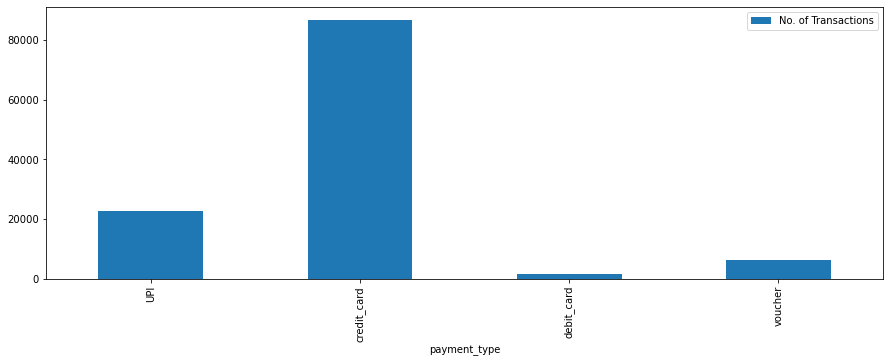

In [114]:
Payment_Type=COOIPPS.groupby('payment_type')[['payment_type']].count().rename(columns={'payment_type':'No. of Transactions'})
print(Payment_Type)
Payment_Type.plot(kind='bar',figsize=(15,5))

# 5. Customer satisfaction towards category & product
### a. Which categories (top 10) are maximum rated & minimum rated?

In [140]:
COOIPPS_Review=pd.merge(left=COOIPPS,right=Order_Review_Ratings,on='order_id')
COOIPPS_Review.head(5)

,customer_id_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,...,product_height_cm,product_width_cm,Month,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,64,31,May,8577,Vijayawada,Andhra Pradesh,88b8b52d46df026a9d1ad2136a59b30b,4,5/26/2017 0:00,5/30/2017 22:34
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,52,17,May,8577,Vijayawada,Andhra Pradesh,5ad6695d76ee186dc473c42706984d87,5,6/15/2018 0:00,6/15/2018 12:10
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,51,28,Mar,8577,Vijayawada,Andhra Pradesh,059a801bb31f6aab2266e672cab87bc5,5,3/29/2018 0:00,4/2/2018 18:36
3,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,Chilakaluripet,Andhra Pradesh,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:00,7/8/2018 10:30,7/25/2018 15:12,...,59,25,Jul,8577,Vijayawada,Andhra Pradesh,2518803238cabbf63564593e4a8fc52d,1,8/9/2018 0:00,8/14/2018 11:40
4,8276de07ef25225d412b8462d73f8664,332cf4e83e16004ba7dca932ce82475b,90010,Eluru,Andhra Pradesh,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:00,4/4/2017 5:55,4/13/2017 16:28,...,45,39,Apr,8577,Vijayawada,Andhra Pradesh,84467f1766775ba4c14fc25b3ca67905,4,5/3/2017 0:00,5/3/2017 21:06


In [176]:
Max_Rated_Category=COOIPPS_Review.groupby('product_category_name')[['review_score']].sum().sort_values(by='review_score',ascending=False).head(10)
print("Top 10 Maximum Rated Category :",Max_Rated_Category)

Top 10 Maximum Rated Category :                        review_score
product_category_name              
Bed_Bath_Table                46366
Health_Beauty                 41315
Sports_Leisure                36856
Furniture_Decor               34407
Computers_Accessories         32002
Housewares                    29854
Watches_Gifts                 24856
Telephony                     18612
Garden_Tools                  18412
Auto                          17770


<AxesSubplot:xlabel='product_category_name'>

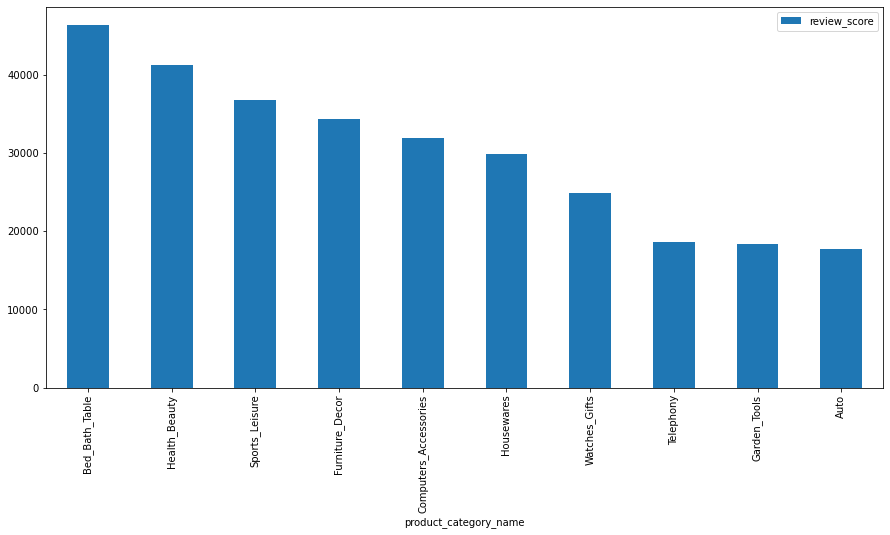

In [182]:
Max_Rated_Category.plot(kind='bar',figsize=(15,7),y='review_score')

In [151]:
Min_Rated_Category=COOIPPS_Review.groupby('product_category_name')[['review_score']].sum().sort_values(by='review_score',ascending=True).head(10)
print("Top 10 Minimum Rated Category :",Min_Rated_Category)

Top 10 Minimum Rated Category :                                    review_score
product_category_name                          
Security_And_Services                         5
Fashion_Childrens_Clothes                    36
La_Cuisine                                   63
Cds_Dvds_Musicals                            65
Arts_And_Craftmanship                        99
Home_Comfort_2                              105
Diapers_And_Hygiene                         127
Fashion_Sport                               132
Flowers                                     139
Furniture_Mattress_And_Upholstery           156


<AxesSubplot:xlabel='product_category_name'>

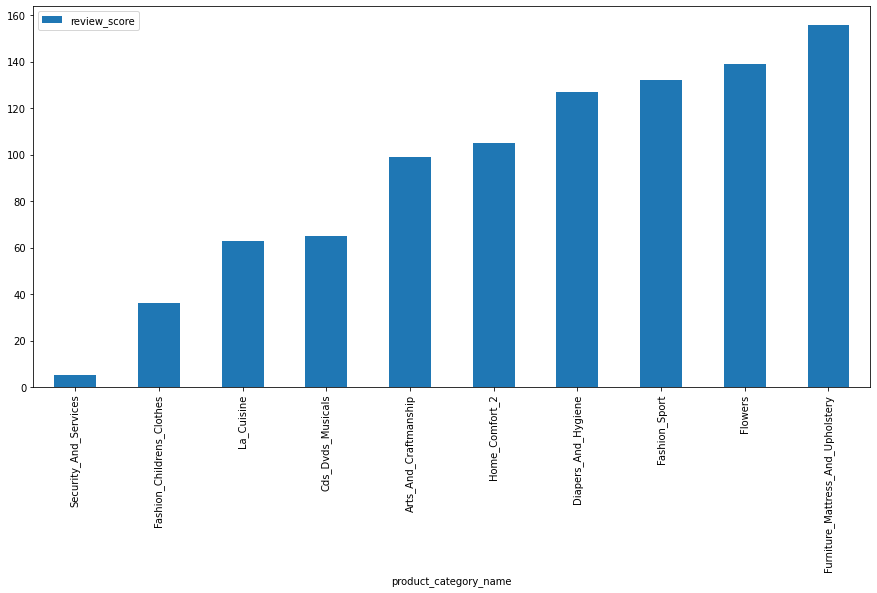

In [181]:
Min_Rated_Category.plot(kind='bar',figsize=(15,7),y='review_score')

### b. Which products (top10) are maximum rated & minimum rated?

In [170]:
# TOP 10 Maximum Rated Products
COOIPPS_Review.loc[:,['product_category_name','review_score']].sort_values(by='review_score',ascending=False).head(10)

,product_category_name,review_score
37252,Housewares,5
48260,Watches_Gifts,5
89173,Housewares,5
89175,Housewares,5
48264,Watches_Gifts,5
48263,Watches_Gifts,5
48262,Watches_Gifts,5
48261,Watches_Gifts,5
48257,Watches_Gifts,5
48285,Watches_Gifts,5


In [173]:
# TOP 10 Minimum Rated Products
COOIPPS_Review.loc[:,['product_category_name','review_score']].sort_values(by='review_score',ascending=True).head(10)

,product_category_name,review_score
118314,Electronics,1
80835,Housewares,1
22220,Health_Beauty,1
22219,Furniture_Decor,1
22213,Home_Construction,1
22212,Furniture_Decor,1
80859,Health_Beauty,1
80875,Health_Beauty,1
80880,Health_Beauty,1
80881,Stationery,1


### c. Average rating by location, seller, product, category, month etc

In [185]:
# Average Rating by location

In [184]:
COOIPPS_Review.groupby('customer_state')[['review_score']].mean()

,review_score
customer_state,
Andhra Pradesh,3.995275
Arunachal Pradesh,4.024242
Chhattisgarh,4.031524
Delhi,4.029
Goa,4.8
Gujarat,4.03757
Haryana,4.117066
Himachal Pradesh,3.988399
Jammu & Kashmir,3.998362


In [ ]:
# Average Rating by seller

In [186]:
COOIPPS_Review.groupby('seller_id')[['review_score']].mean()

,review_score
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667
001cca7ae9ae17fb1caed9dfb1094831,3.883817
001e6ad469a905060d959994f1b41e4f,1.0
002100f778ceb8431b7a1020ff7ab48f,4.033898
003554e2dce176b5555353e4f3555ac8,5.0
...,...
ffcfefa19b08742c5d315f2791395ee5,1.0
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.285714
ffeee66ac5d5a62fe688b9d26f83f534,4.214286


In [ ]:
# Average Rating by Product Category Name

In [187]:
COOIPPS_Review.groupby('product_category_name')[['review_score']].mean()

,review_score
product_category_name,
Agro_Industry_And_Commerce,4.150794
Air_Conditioning,3.92053
Art,3.917808
Arts_And_Craftmanship,4.125
Audio,3.824147
...,...
Stationery,4.176381
Tablets_Printing_Image,4.045977
Telephony,3.938214


In [ ]:
# Average Rating by Month

In [188]:
COOIPPS_Review.groupby('Month')[['review_score']].mean()

,review_score
Month,
Apr,4.036545
Aug,4.204288
Dec,3.927987
Feb,3.788968
Jan,3.943279
Jul,4.16924
Jun,4.156802
Mar,3.781311
May,4.118807



# FINISH